This Model takes on loan data from a Bank, with an outcome on whether the loan was approved or not.
We go ahead and create an algorithm to predict if the Loan will be approved or not.

In [66]:
# Import all the required libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
import os

In [67]:
# import the Loan Dataset to be used to train the model

df=pd.read_csv("loan dataset/train_u6lujuX_CVtuZ9i.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [68]:
df.shape

(614, 13)

In [69]:
df.size

7982

In [70]:
# some descriptive stats for numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


We are now going to start cleaning the data

Handling missing data

In [71]:
# We check the columns with null values
df.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [72]:
# fill the values using backward 'bfill' and 'ffill' method
df.fillna(method='ffill',inplace=True)
df.fillna(method='bfill',inplace=True)

In [73]:
# We check the columns with null values again to see if the missing values have been handled
df.isnull().sum().sort_values(ascending=False)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [74]:
# We check for duplicated rows

df.duplicated().any()


False

The percentage of Y class : 0.69
The percentage of N class : 0.31


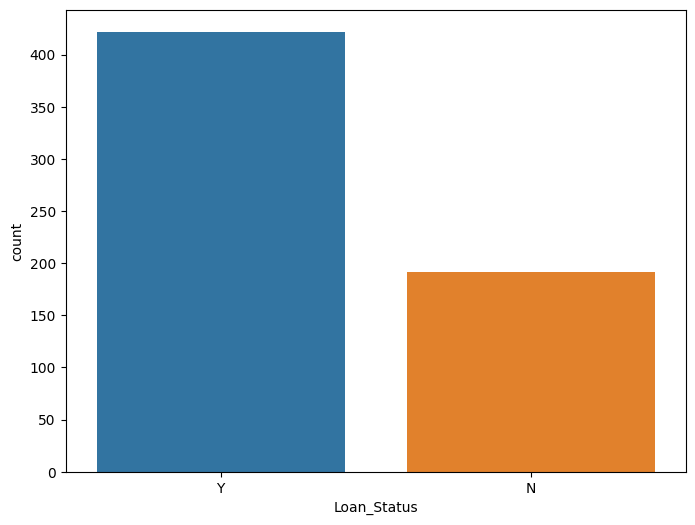

In [75]:
# We check to see if the data is balanced

plt.figure(figsize=(8,6))
sns.countplot(df['Loan_Status']);

print('The percentage of Y class : %.2f' % (df['Loan_Status'].value_counts()[0] / len(df)))
print('The percentage of N class : %.2f' % (df['Loan_Status'].value_counts()[1] / len(df)))

The Data is Imbalanced, but we shall handle the imbalance later

In [76]:
# we will drop ID because it's not important for our model and it will just mislead the model

df.drop('Loan_ID', axis=1, inplace=True)


Let us do some Explatory Data Analysis to understand the data

In [77]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [78]:
df.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y


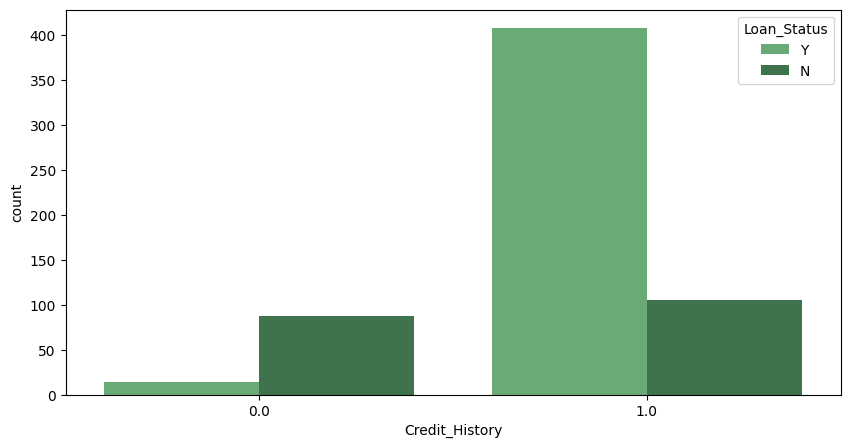

In [79]:
# credit history

plt.figure(figsize=(10,5))
sns.countplot(x='Credit_History',data=df,hue='Loan_Status',palette='Greens_d')
plt.show()

# we didn't give a loan for most people who got Credit History = 0
# but we did give a loan for most of people who got Credit History = 1
# so we can say if you got Credit History = 1 , you will have better chance to get a loan


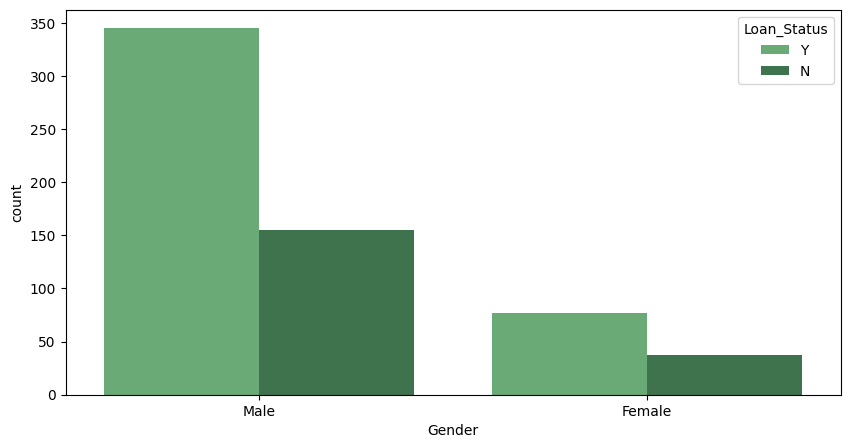

In [80]:
# gender

plt.figure(figsize=(10,5))
sns.countplot(x='Gender',data=df,hue='Loan_Status',palette='Greens_d')
plt.show()

# more males got loans than females
# you have a better chance of getting a loan if you are Male

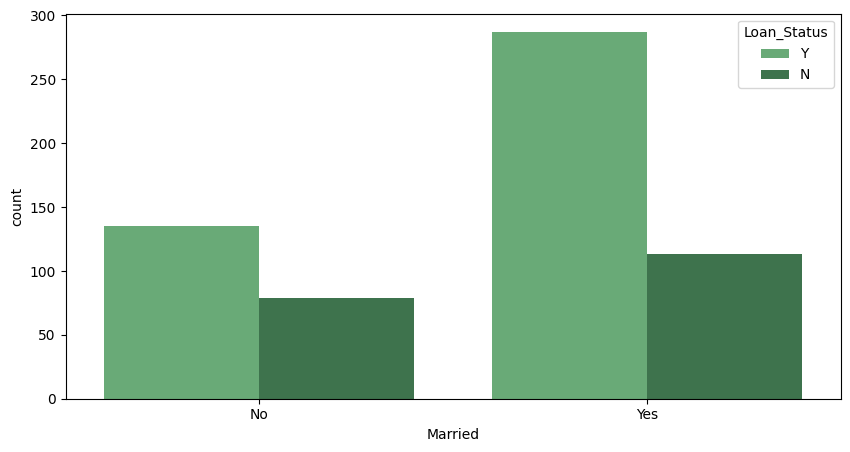

In [81]:
# married

plt.figure(figsize=(10,5))
sns.countplot(x='Married',data=df,hue='Loan_Status',palette='Greens_d')
plt.show()

# more married people got loans than non-married

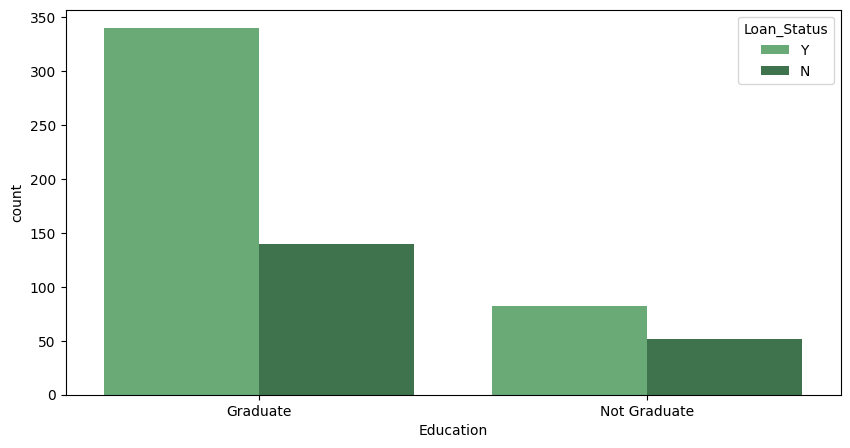

In [82]:
# Education

plt.figure(figsize=(10,5))
sns.countplot(x='Education',data=df,hue='Loan_Status',palette='Greens_d')
plt.show()

# Graduate more likely to get a loan

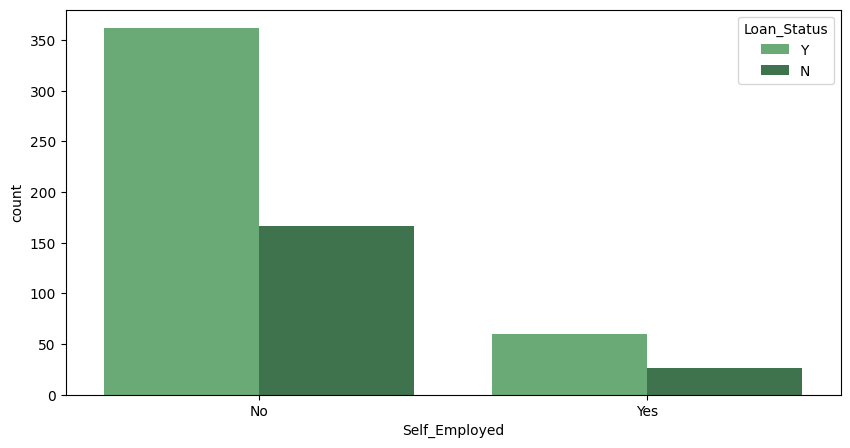

In [83]:
# Self Employed

plt.figure(figsize=(10,5))
sns.countplot(x='Self_Employed',data=df,hue='Loan_Status',palette='Greens_d')
plt.show()

# Employed people more likely to get a loan

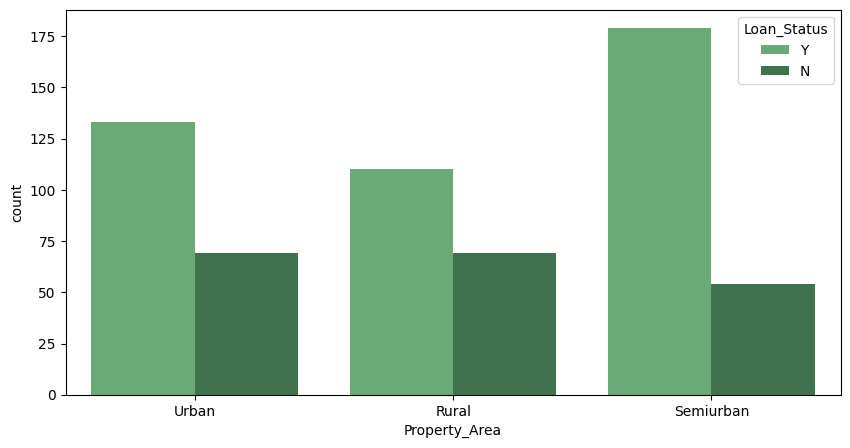

In [84]:
# Property Area

plt.figure(figsize=(10,5))
sns.countplot(x='Property_Area',data=df,hue='Loan_Status',palette='Greens_d')
plt.show()

# Propotion of people more likely to get a loan the same

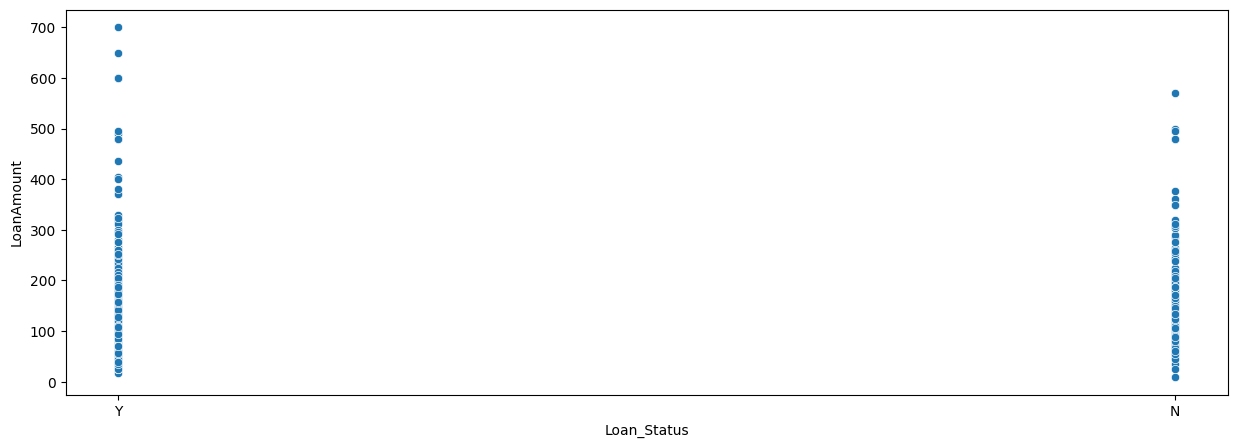

In [85]:
plt.figure(figsize=(15,5))
sns.scatterplot(x="Loan_Status",y="LoanAmount",data=df)
plt.show()

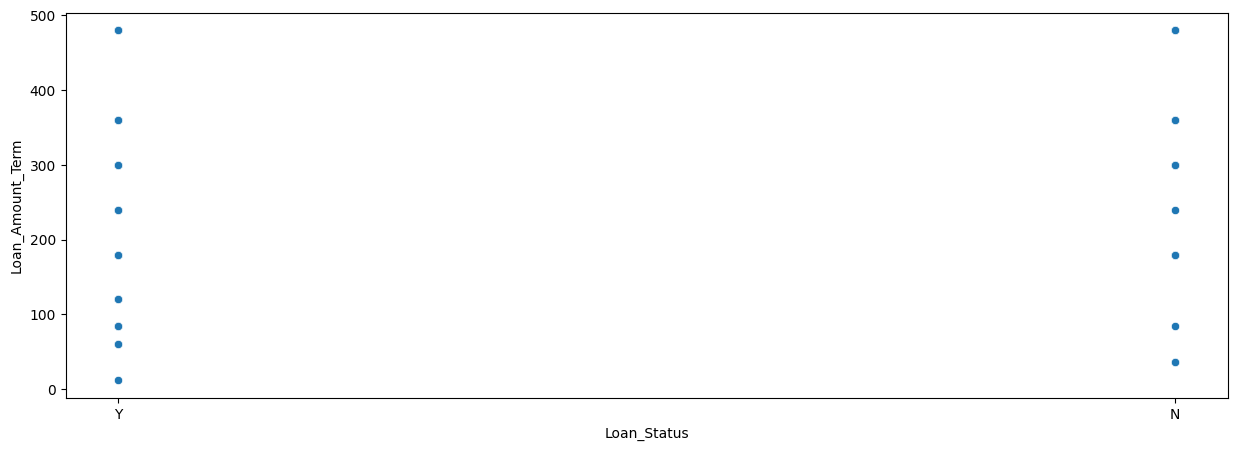

In [86]:
plt.figure(figsize=(15,5))
sns.scatterplot(x="Loan_Status",y="Loan_Amount_Term",data=df)
plt.show()

<Figure size 1000x500 with 0 Axes>

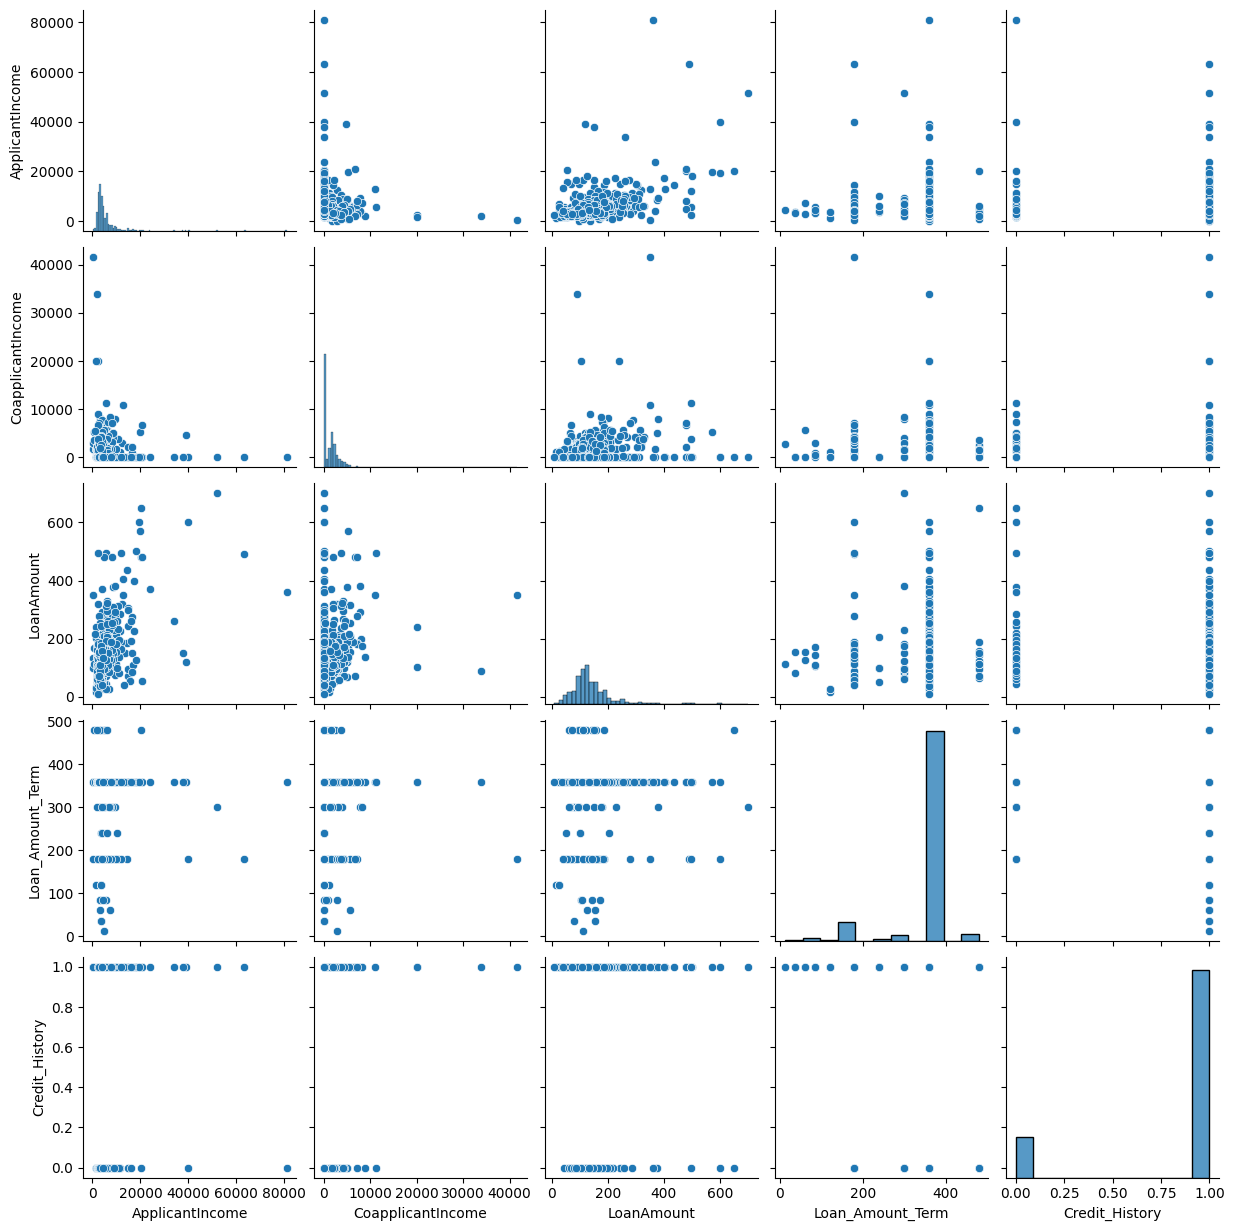

In [87]:
plt.figure(figsize=(10,5))
sns.pairplot(df)
plt.show()

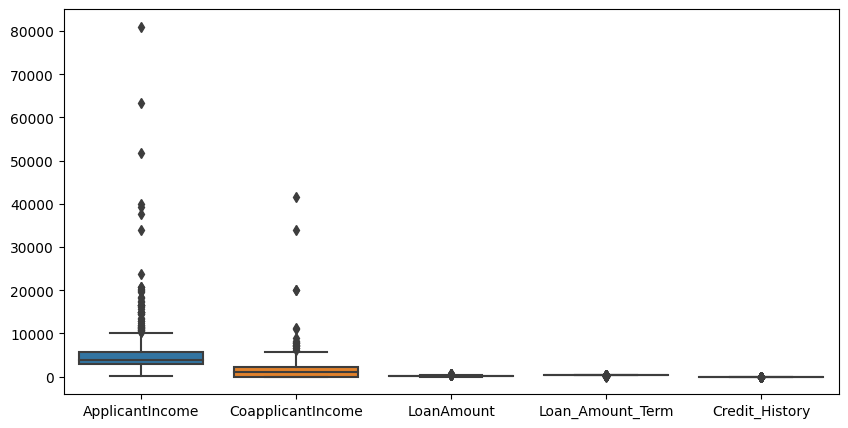

In [88]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df)
plt.show()

In [89]:
# encoding categorical columns into numerical
from sklearn.preprocessing import LabelEncoder  
le = LabelEncoder()

In [90]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [91]:
# transform the target column

target_values = {'Y': 1 , 'N' : 0}

target = df['Loan_Status']
df.drop('Loan_Status', axis=1, inplace=True)

target = target.map(target_values)

In [92]:
for i in df:
    df[i] = le.fit_transform(df[i])

In [93]:
df = pd.concat([df, target], axis=1)

In [94]:
df.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,376,0,81,8,1,2,1
1,1,1,1,0,0,306,60,81,8,1,0,0
2,1,1,0,0,1,139,0,26,8,1,2,1


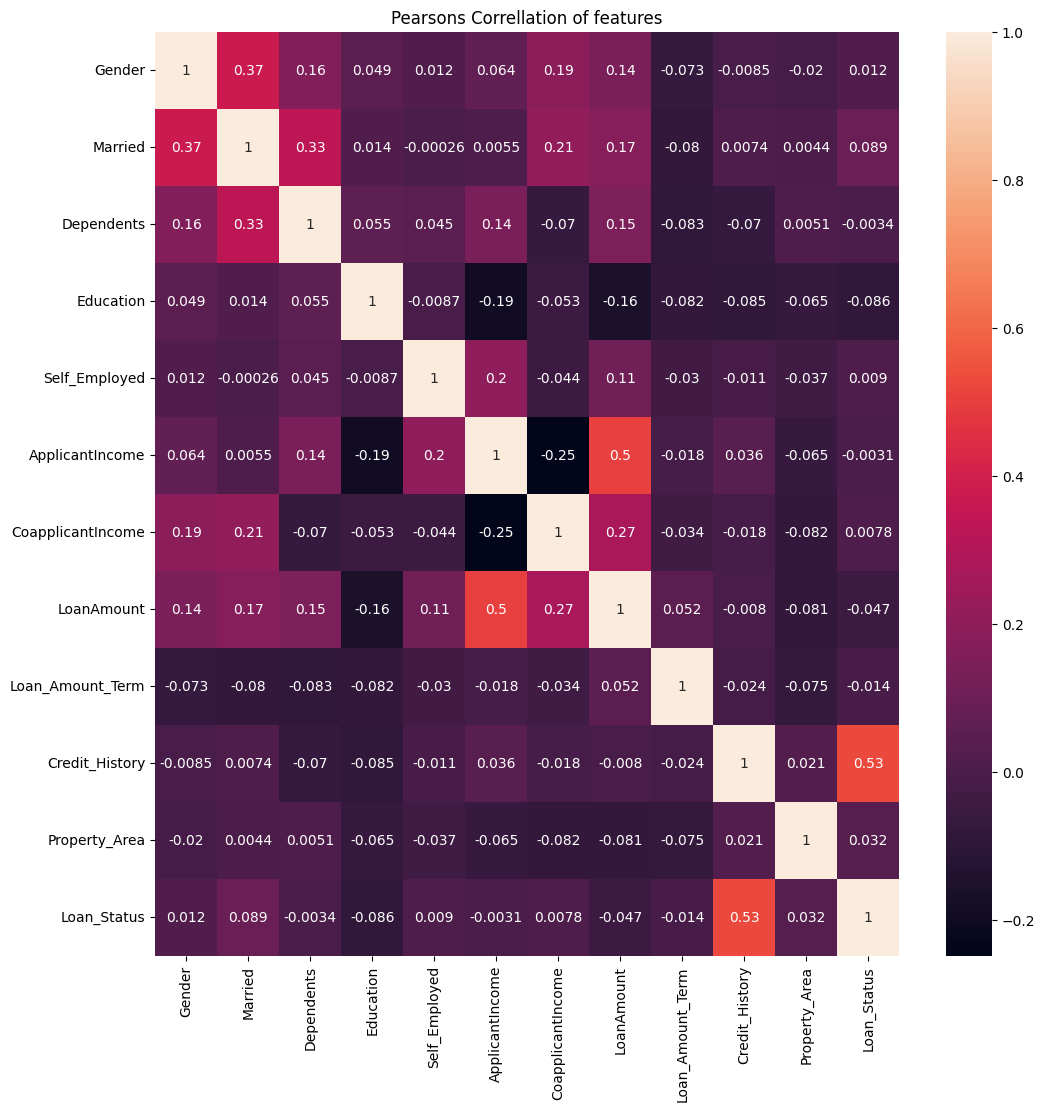

In [98]:
# feature correllation
import matplotlib.pyplot as plt
import seaborn as sn

plt.figure(figsize=(12,12))
plt.title('Pearsons Correllation of features')
sn.heatmap(df.corr(),  annot= True)
plt.show()

Credit History is the biggest determinant if a person will be offered a loan or not, and Education is the least considered factor.

In [95]:
# we shall now train the model 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier

In [100]:
X= df.drop(columns=['Loan_Status'])
y=df['Loan_Status']

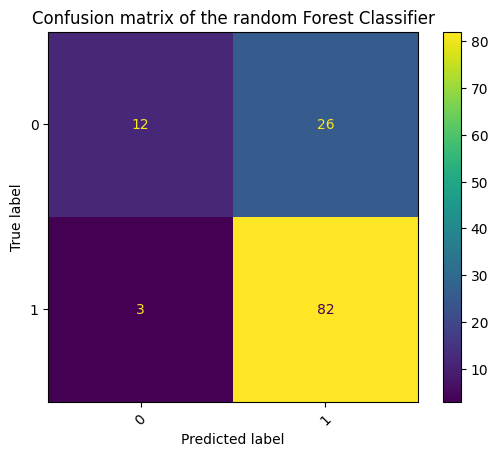

In [101]:
#Splitting the dataset into training and testing
X_train,X_test,y_train,y_test= train_test_split(X,y , test_size=0.2, stratify=y)
Model= RandomForestClassifier(n_estimators=150, random_state=1, class_weight='balanced', max_depth=200)
Model.fit(X_train, y_train)
y_pred= Model.predict(X_test)
fig=plot_confusion_matrix(Model,X_test,y_test,xticks_rotation=45)
plt.title('Confusion matrix of the random Forest Classifier')
plt.show()

In [102]:
print(accuracy_score(y_test,y_pred))

0.7642276422764228


In [103]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.32      0.45        38
           1       0.76      0.96      0.85        85

    accuracy                           0.76       123
   macro avg       0.78      0.64      0.65       123
weighted avg       0.77      0.76      0.73       123



###  Handling Class Imbalance

In [104]:
#Discovering Class Imbalance
y_train.value_counts()

1    337
0    154
Name: Loan_Status, dtype: int64

In [105]:
#Using Smote to  remedy the observed class Imbalance
sm= SMOTE(random_state=2)
X_train_res,y_train_res= sm.fit_resample(X_train,y_train)
y_train_res.value_counts()

1    337
0    337
Name: Loan_Status, dtype: int64

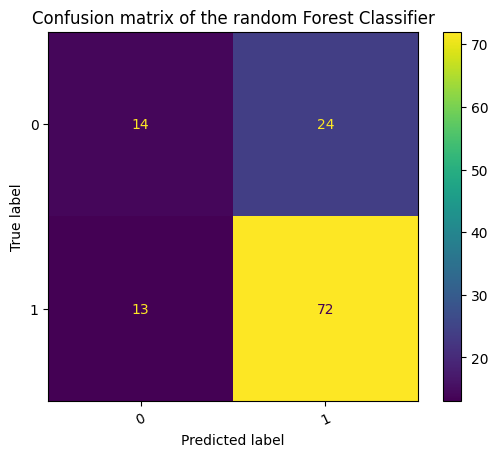

0.6991869918699187
              precision    recall  f1-score   support

           0       0.52      0.37      0.43        38
           1       0.75      0.85      0.80        85

    accuracy                           0.70       123
   macro avg       0.63      0.61      0.61       123
weighted avg       0.68      0.70      0.68       123



In [106]:
Model= RandomForestClassifier(n_estimators=250, random_state=42, n_jobs=20, max_depth=40)
Model.fit(X_train_res, y_train_res)
y_pred_res= Model.predict(X_test)
fig=plot_confusion_matrix(Model,X_test,y_test,xticks_rotation=25)
plt.title('Confusion matrix of the random Forest Classifier')
plt.show()
print(accuracy_score(y_test,y_pred_res))
print(classification_report(y_test,y_pred_res))

In [107]:
print(accuracy_score(y_test,y_pred_res))

0.6991869918699187


In [108]:
print(classification_report(y_test,y_pred_res))

              precision    recall  f1-score   support

           0       0.52      0.37      0.43        38
           1       0.75      0.85      0.80        85

    accuracy                           0.70       123
   macro avg       0.63      0.61      0.61       123
weighted avg       0.68      0.70      0.68       123



### Imbalanced Learning using Balanced RF

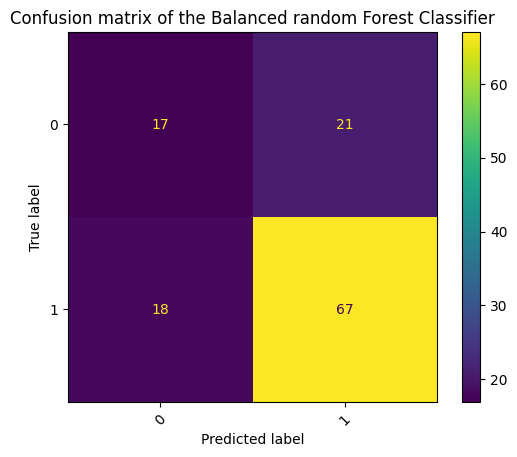

In [109]:
from imblearn.ensemble import BalancedRandomForestClassifier
BRFC = BalancedRandomForestClassifier(n_estimators=10, random_state=2, class_weight='balanced')
BRFC.fit(X_train_res, y_train_res)
y_pred_bal= BRFC.predict(X_test)
fig=plot_confusion_matrix(BRFC,X_test,y_test,xticks_rotation=45)
plt.title('Confusion matrix of the Balanced random Forest Classifier')
plt.show()

In [110]:
print(accuracy_score(y_test,y_pred_bal))

0.6829268292682927


## We test using ADA Boost

In [111]:

ada_clf = AdaBoostClassifier()
params={ 'n_estimators':np.arange(10,300,100),
       'learning_rate':[0.01,0.05,0.1,1]}
classes = y_train_res.unique()

#Execute Grid search
grid_clf = GridSearchCV( estimator=ada_clf, scoring='f1_weighted', param_grid=params, cv=5)
grid_clf.fit(X_train_res, y_train_res)
print("The best parameters are: ", grid_clf.best_params_)

The best parameters are:  {'learning_rate': 0.1, 'n_estimators': 210}


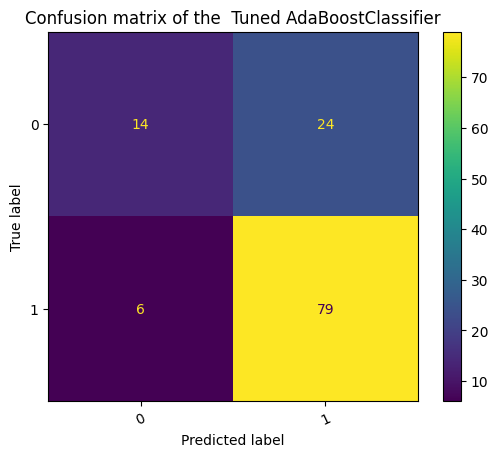

0.7560975609756098
              precision    recall  f1-score   support

           0       0.70      0.37      0.48        38
           1       0.77      0.93      0.84        85

    accuracy                           0.76       123
   macro avg       0.73      0.65      0.66       123
weighted avg       0.75      0.76      0.73       123



In [112]:
ada_c= AdaBoostClassifier(**grid_clf.best_params_)
ada_c.fit(X_train_res,y_train_res)
y_pred_adaG= ada_c.predict(X_test)
fig=plot_confusion_matrix(ada_c,X_test,y_test,xticks_rotation=25)
plt.title('Confusion matrix of the  Tuned AdaBoostClassifier')
plt.show()
print(accuracy_score(y_test, y_pred_adaG))
print(classification_report(y_test,y_pred_adaG))

## So the AdaBoost Model gives the best results and can be used to predict Loans